In [1]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%autosave 60

Autosaving every 60 seconds


In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [3]:
path = os.path.join("Resources", "online_shoppers_intention.csv")

In [4]:
OSHIdf = pd.read_csv(path)

In [5]:
OSHIdf.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
#list of attributes 
OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
#Attributes data type
OSHIdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

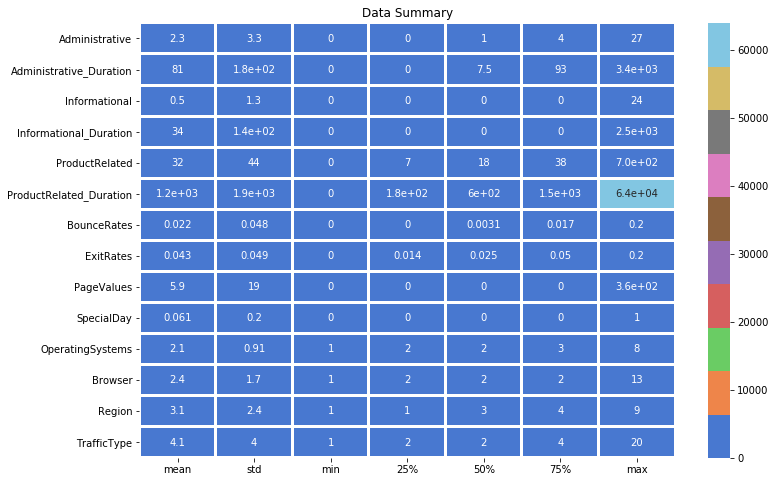

In [8]:
#Checking the summary of numeric attributes 
plt.figure(figsize = (12,8))
sns.heatmap(OSHIdf.describe()[1:].transpose(),
            annot=True,linecolor = "w",
            linewidth=2, cmap=sns.color_palette("muted"))
plt.title("Data Summary")
plt.show()

Text(0, 0.5, 'Count of Users')

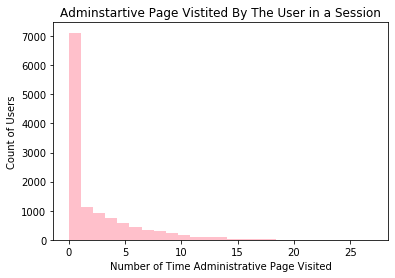

In [9]:
#Generating histograms for quantitative variables 
#Administrative 
hist_plot_Administartive = OSHIdf['Administrative'].hist(bins = 25, grid = False, color = "pink")
hist_plot_Administartive.set_title('Adminstartive Page Vistited By The User in a Session')
hist_plot_Administartive.set_xlabel('Number of Time Administrative Page Visited')
hist_plot_Administartive.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

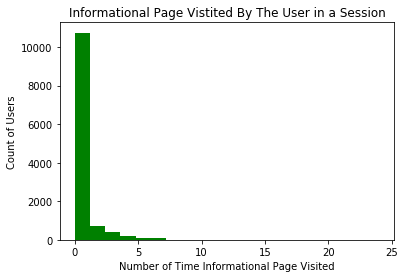

In [10]:
#Generating histograms for quantitative variables 
#Informational
hist_plot_Informational = OSHIdf['Informational'].hist(bins = 20, grid = False, color = "green")
hist_plot_Informational.set_title('Informational Page Vistited By The User in a Session')
hist_plot_Informational.set_xlabel('Number of Time Informational Page Visited')
hist_plot_Informational.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

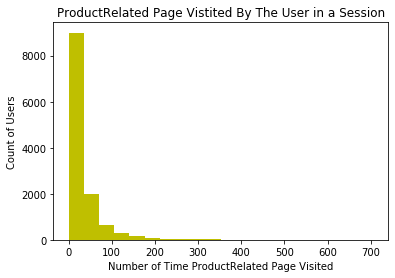

In [11]:
#Generating histograms for quantitative variables 
#ProductRelated
hist_plot_ProductRelated = OSHIdf['ProductRelated'].hist(bins = 20, grid = False, color = "y")
hist_plot_ProductRelated.set_title('ProductRelated Page Vistited By The User in a Session')
hist_plot_ProductRelated.set_xlabel('Number of Time ProductRelated Page Visited')
hist_plot_ProductRelated.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

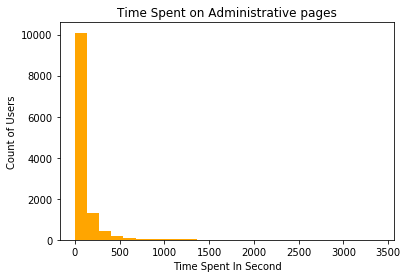

In [12]:
#Generating histograms for quantitative variables 
#Administrative_Duration
hist_plot_Administrative_Duration = OSHIdf['Administrative_Duration'].hist(bins = 25, grid = False, color = "orange")
hist_plot_Administrative_Duration.set_title('Time Spent on Administrative pages')
hist_plot_Administrative_Duration.set_xlabel('Time Spent In Second')
hist_plot_Administrative_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

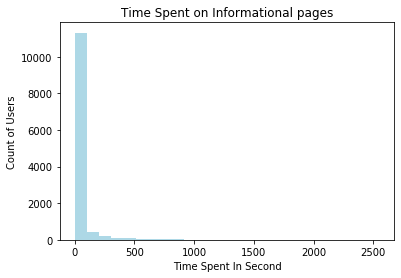

In [13]:
#Generating histograms for quantitative variables 
#Informational_Duration'
hist_plot_Informational_Duration = OSHIdf['Informational_Duration'].hist(bins = 25, grid = False, color = "lightblue")
hist_plot_Informational_Duration.set_title('Time Spent on Informational pages')
hist_plot_Informational_Duration.set_xlabel('Time Spent In Second')
hist_plot_Informational_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

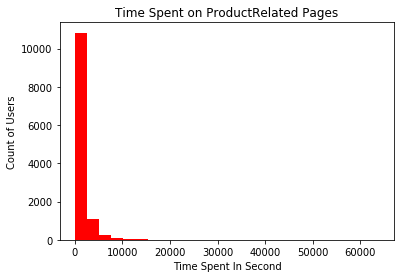

In [14]:
#Generating histograms for quantitative variables 
#ProductRelated_Duration
hist_plot_ProductRelated_Duration = OSHIdf['ProductRelated_Duration'].hist(bins = 25, grid = False, color = "r")
hist_plot_ProductRelated_Duration.set_title('Time Spent on ProductRelated Pages')
hist_plot_ProductRelated_Duration.set_xlabel('Time Spent In Second')
hist_plot_ProductRelated_Duration.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

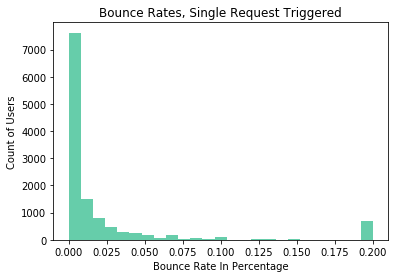

In [15]:
#Generating histograms for quantitative variables 
#BounceRates
hist_plot_BounceRates = OSHIdf['BounceRates'].hist(bins = 25, grid = False, color = "mediumaquamarine")
hist_plot_BounceRates.set_title('Bounce Rates, Single Request Triggered')
hist_plot_BounceRates.set_xlabel('Bounce Rate In Percentage')
hist_plot_BounceRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

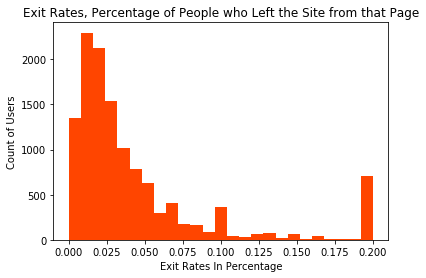

In [16]:
#Generating histograms for quantitative variables 
#Exit Rates
hist_plot_ExitRates = OSHIdf['ExitRates'].hist(bins = 25, grid = False, color = "orangered")
hist_plot_ExitRates.set_title('Exit Rates, Percentage of People who Left the Site from that Page')
hist_plot_ExitRates.set_xlabel('Exit Rates In Percentage')
hist_plot_ExitRates.set_ylabel('Count of Users')

Text(0, 0.5, 'Count of Users')

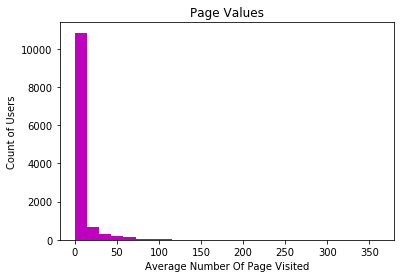

In [17]:
#Generating histograms for quantitative variables 
#Page Values
hist_plot_PageValues = OSHIdf['PageValues'].hist(bins = 25, grid = False, color = "m")
hist_plot_PageValues.set_title('Page Values')
hist_plot_PageValues.set_xlabel('Average Number Of Page Visited')
hist_plot_PageValues.set_ylabel('Count of Users')

In [18]:
#Checking the levels and frequency tables for categorical variables 
#frequency table for Month
pd.crosstab(index = OSHIdf["Month"], columns = "Count")

col_0,Count
Month,
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549


In [19]:
#Visualization of Month vs Revenue 
pd.crosstab(OSHIdf["Month"], OSHIdf["Revenue"])
OSHIdf.div(OSHIdf.sum(1). astype(float), axis = 0). plot( kind = "bar", stacked
                                                        = True, figsize = (16, 9), color = ["red", "blue"])
plt.tiltle("Distribution of Month By Revenue", fontsize = 17)
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
#Visualization of Month vs Revenue 
pd.crosstab(OSHIdf["Weekend"], OSHIdf["Revenue"])
OSHIdf.div(OSHIdf.sum(1). astype(float), axis = 0). plot( kind = "bar", stacked = True, figsize = (16, 9), 
                                                         color = ["red", "blue"])
plt.tiltle("Distribution of Weekend By Revenue", fontsize = 17)
plt.show()

In [ ]:
#Checking the levels and frequency tables for categorical variables 
#frequency table for Month
pd.crosstab(index = OSHIdf["Month"], columns = "Count")

In [ ]:
#Percentage of different visitors type in the dataset
plt.rcParams["figure.figsize"] = (20, 10)
size = [10551, 1694, 85]
colors = ["g", "y", "r"]
labels = "Returning Vistors", "New Vistors", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title("Vistors Type", fontsize = 22)
plt.axis("off")
plt.legend()

In [ ]:
#frequency table for Weekend
pd.crosstab(index = OSHIdf["Weekend"], columns = "Count")

In [ ]:
#frequency table for Revenue 
pd.crosstab(index = OSHIdf["Revenue"], columns = "Count")
plt.figure(figsize =(10, 6)
print("Did not buy:", len(OSHIdf[OSHIdf.Revenue == 0]))
print("Bought:", len(OSHIdf[OSHIdf.Revenue == 1]))
y = len(OSHIdf[OSHIdf.Revenue == 0]), len(OSHIdf[OSHIdf.Revenue == 1])
x = ["Did not buy", "Bought"]
plt.bar(x, y, color = "lightgreen")
plt.show 

In [ ]:
#Plotting the Revenue 
plt.figure(figsize =(10, 6))
print("Did not buy:", len(OSHIdf[OSHIdf.Revenue == 0]))
print("Bought:", len(OSHIdf[OSHIdf.Revenue == 1]))
y = len(OSHIdf[OSHIdf.Revenue == 0]), len(OSHIdf[OSHIdf.Revenue == 1])
x = ["Did not buy", "Bought"]
plt.bar(x, y, color = "lightgreen")
plt.show 

In [ ]:
#ploting numeric variables 


In [ ]:
#frequency table for Revenue 
pd.crosstab(index = OSHIdf["Revenue"], columns = "Count")

In [ ]:
OSHIy = OSHIdf.iloc[:, :17:18]
OSHIy.shape

In [ ]:
cleanOSHIX = OSHIX

In [ ]:
#Handling non-numeric features/creating dummy or indicator variables 
cleanOSHIX = pd.get_dummies(cleanOSHIX, columns=['Month', 'VisitorType', 'Weekend'], drop_first = True)

In [ ]:
cleanOSHIX.shape

In [ ]:
cleanOSHIX.head(20)

In [ ]:
#In python we need to distinguish between the matrix of features(Independent variables) and the dependent variable vector
OSHIX = OSHIdf.iloc[:, :-1]
OSHIX.shape

In [ ]:
#Is there any NA in the dataset
cleanOSHIX.isna().sum()

In [ ]:
#Is there any null in the dataset 
cleanOSHIX.isnull().sum()

In [ ]:
cleanOSHIX["Administrative"].value_counts()

In [ ]:
#6562 user clicked on Administative pages and 5768 of them clicked on the other two(informational or product_related pages)
(cleanOSHIX["Administrative"] >= 1).value_counts()

In [ ]:
##9699 user clicked on AInformational pages and 2631 of them clicked on the other two(Adminstartive or product_related pages)
(cleanOSHIX["Informational"] >= 1).value_counts()

In [ ]:
##12292 of user clicked on Administative pages and 38 of them clicked on the other two(informational or Administrative)
(cleanOSHIX["ProductRelated"] >= 1).value_counts()